In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Symbol, integrate
%matplotlib notebook

### Smooth local paths
We will use cubic spirals to generate smooth local paths. Without loss of generality, as $\theta$ smoothly changes from 0 to 1, we impose a condition on the curvature as follows

$\kappa = f'(\theta) = K(\theta(1-\theta))^n $

This ensures curvature vanishes at the beginning and end of the path. Integrating, the yaw changes as
$\theta = \int_0^x f'(\theta)d\theta$

With $n = 1$ we get a cubic spiral, $n=2$ we get a quintic spiral and so on. Let us use the sympy package to find the family of spirals

1. Declare $x$ a Symbol

2. You want to find Integral of $f'(x)$

3. You can choose $K$ so that all coefficients are integers

Verify if $\theta(0) = 0$ and $\theta(1) = 1$

In [2]:
K =   30#choose for cubic/quintic
n =  2#choose for cubic/ quintic
x =  Symbol('x')#declare as Symbol
print(integrate(K*(x*(1-x))**n, x)) # complete the expression

6*x**5 - 15*x**4 + 10*x**3


In [3]:
#write function to compute a cubic spiral
#input/ output can be any theta
def cubic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    theta = (-2*x**3 + 3*x**2) * (theta_f-theta_i) + theta_i
    return theta
    # pass 

def quintic_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    theta = (6*x**5 - 15*x**4 + 10*x**3)* (theta_f-theta_i) + theta_i
    return theta
    # pass
def circular_spiral(theta_i, theta_f, n=10):
    x = np.linspace(0, 1, num=n)
    theta = x* (theta_f-theta_i) + theta_i
    return theta

### Plotting
Plot cubic, quintic spirals along with how $\theta$ will change when moving in a circular arc. Remember circular arc is when  $\omega $ is constant


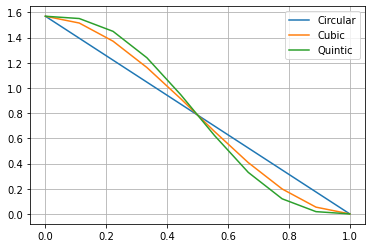

In [4]:
theta_i = 1.57
theta_f = 0
n = 10
x = np.linspace(0, 1, num=n)
plt.figure()
plt.plot(x,circular_spiral(theta_i, theta_f, n),label='Circular')
plt.plot(x,cubic_spiral(theta_i, theta_f, n), label='Cubic')
plt.plot(x,quintic_spiral(theta_i, theta_f, n), label='Quintic')

plt.grid()
plt.legend()

## Trajectory

Using the spirals, convert them to trajectories $\{(x_i,y_i,\theta_i)\}$. Remember the unicycle model 

$dx = v\cos \theta dt$

$dy = v\sin \theta dt$

$\theta$ is given by the spiral functions you just wrote. Use cumsum() in numpy to calculate {}

What happens when you change $v$?

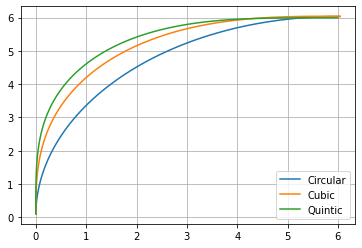

In [5]:
v = 1
dt = 0.1
theta_i = 1.57
theta_f = 0
n = 100
theta_cubic = cubic_spiral(theta_i, theta_f, n)
theta_quintic = quintic_spiral(theta_i, theta_f, int(n+(23/1000)*n))
theta_circular = circular_spiral(theta_i, theta_f, int(n-(48/1000)*n))
# print(theta)
def trajectory(v,dt,theta):
    dx = v*np.cos(theta) *dt
    dy = v*np.sin(theta) *dt
    # print(dx)
    x = np.cumsum(dx)
    y = np.cumsum(dy)
    return x,y

# plot trajectories for circular/ cubic/ quintic
plt.figure()
plt.plot(*trajectory(v,dt,theta_circular), label='Circular')
plt.plot(*trajectory(v,dt,theta_cubic), label='Cubic')
plt.plot(*trajectory(v,dt,theta_quintic), label='Quintic')


plt.grid()
plt.legend()

## Symmetric poses

We have been doing only examples with $|\theta_i - \theta_f| = \pi/2$. 

What about other orientation changes? Given below is an array of terminal angles (they are in degrees!). Start from 0 deg and plot the family of trajectories

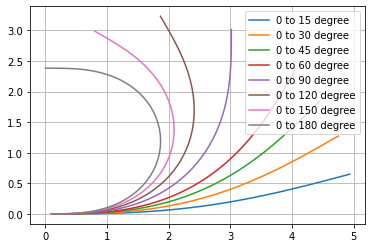

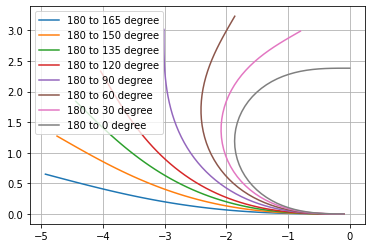

In [6]:
dt = 0.1
thetas = [15, 30, 45, 60, 90, 120, 150, 180] #convert to radians
plt.figure()
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y, label=f'0 to {tf} degree')
plt.grid()
plt.legend()
# On the same plot, move from 180 to 180 - theta
#thetas = 
plt.figure()
for tf in thetas:
    t = cubic_spiral(np.pi, np.pi-np.deg2rad(tf),50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    plt.plot(x, y, label=f'180 to {180-tf} degree')


plt.grid()
plt.legend()

Modify your code to print the following for the positive terminal angles $\{\theta_f\}$
1. Final x, y position in corresponding trajectory: $x_f, y_f$ 
2. $\frac{y_f}{x_f}$ and $\tan \frac{\theta_f}{2}$

What do you notice? 
What happens when $v$ is doubled?

In [7]:
dt = 0.1
thetas = [15, 30, 45, 60, 90, 120, 150, 180] #convert to radians
# plt.figure()
for tf in thetas:
    t = cubic_spiral(0, np.deg2rad(tf),50)
    x = np.cumsum(np.cos(t)*dt)
    y = np.cumsum(np.sin(t)*dt)
    print(f'tf: {tf} x_f : {x[-1]} y_f: {y[-1]} y_f/x_f : {y[-1]/x[-1]} tan (theta_f/2) : {np.tan(np.deg2rad(tf)/2)}')


tf: 15 x_f : 4.936181599941893 y_f: 0.6498606361772978 y_f/x_f : 0.13165249758739583 tan (theta_f/2) : 0.13165249758739583
tf: 30 x_f : 4.747888365557456 y_f: 1.2721928533042435 y_f/x_f : 0.2679491924311227 tan (theta_f/2) : 0.2679491924311227
tf: 45 x_f : 4.444428497864582 y_f: 1.8409425608129912 y_f/x_f : 0.41421356237309487 tan (theta_f/2) : 0.41421356237309503
tf: 60 x_f : 4.040733895009051 y_f: 2.3329188020071205 y_f/x_f : 0.5773502691896257 tan (theta_f/2) : 0.5773502691896257
tf: 90 x_f : 3.0152040529843056 y_f: 3.0152040529843065 y_f/x_f : 1.0000000000000002 tan (theta_f/2) : 0.9999999999999999
tf: 120 x_f : 1.8653713069408235 y_f: 3.230917878602665 y_f/x_f : 1.7320508075688772 tan (theta_f/2) : 1.7320508075688767
tf: 150 x_f : 0.8004297415440109 y_f: 2.9872444633314705 y_f/x_f : 3.732050807568873 tan (theta_f/2) : 3.7320508075688776
tf: 180 x_f : 5.551115123125783e-17 y_f: 2.3817721504025933 y_f/x_f : 4.290619267613818e+16 tan (theta_f/2) : 1.633123935319537e+16


These are called *symmetric poses*. With this spiral-fitting approach, only symmetric poses can be reached. 

In order to move between any 2 arbitrary poses, you will have to find an intermediate pose that is pair-wise symmetric to the start and the end pose. 

What should be the intermediate pose? There are infinite possibilities. We would have to formulate it as an optimization problem. As they say, that has to be left for another time!